Q) Prepare a classification model using Naive Bayes 
for salary data 

In [1]:
#load libraries and data set
import pandas as pd
import numpy as np
df=pd.read_csv('D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Naive Bayes\\SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df1=df.copy()

In [3]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# check correlations
df1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


## Data Visulisation

In [6]:
#profile = ProfileReport(data,title='Pandas Profiling Report',explorative=True)
#profile

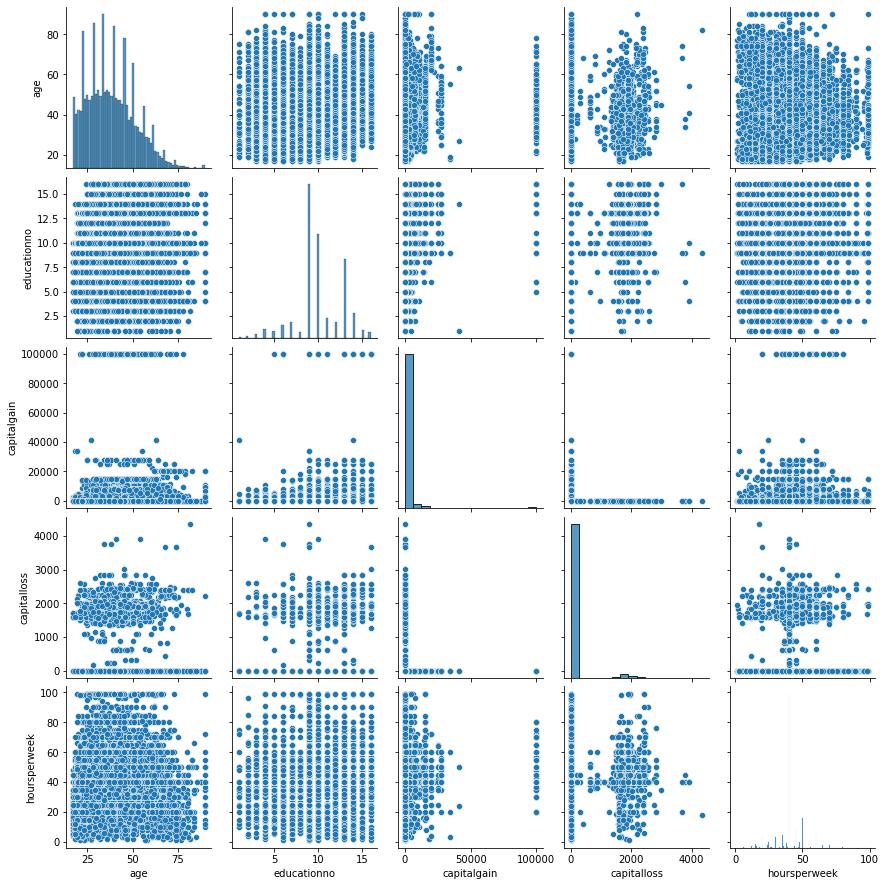

In [7]:
import seaborn as sns
sns.pairplot(df1)

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

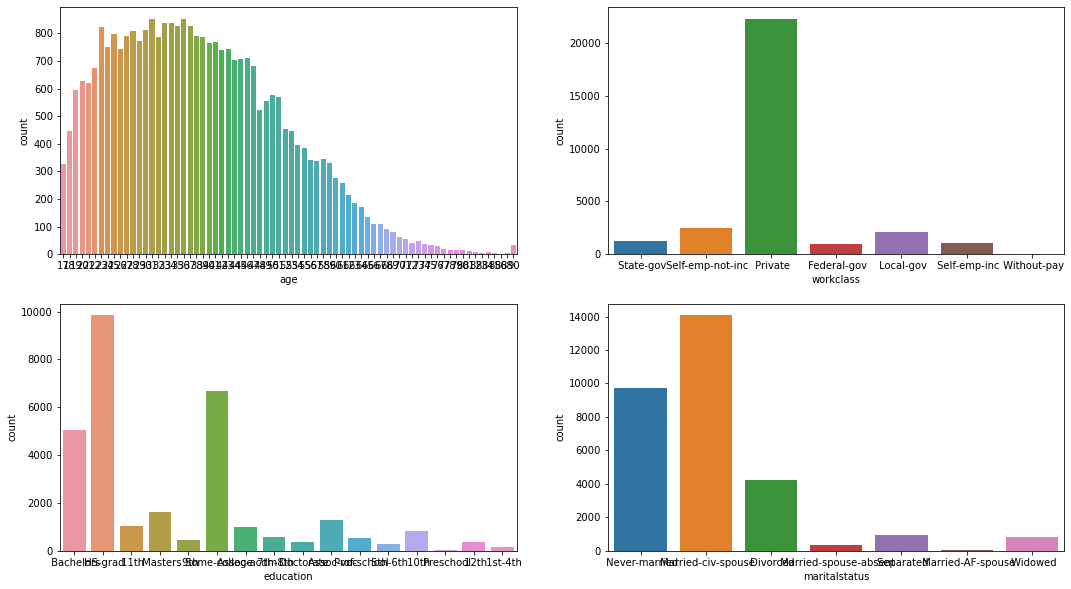

In [9]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.countplot('age',data=df1)
plt.subplot(222)
sns.countplot('workclass',data=df1)
plt.subplot(223)
sns.countplot('education',data=df1)
plt.subplot(224)
sns.countplot('maritalstatus',data=df1)
plt.show()

Interpretation:

##### 1) from above fig, maximum age is between 18 to 50 
##### 2) In workclass, count of privet is 20000+ 
##### 3) In education two entries are maximum (HS-grad and Some-college) 
##### 4) In marital status, most count in "Married-civ-spouse"

In [10]:
#check no. of columns
df1.columns.values

array(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'], dtype=object)

<AxesSubplot:xlabel='native', ylabel='count'>

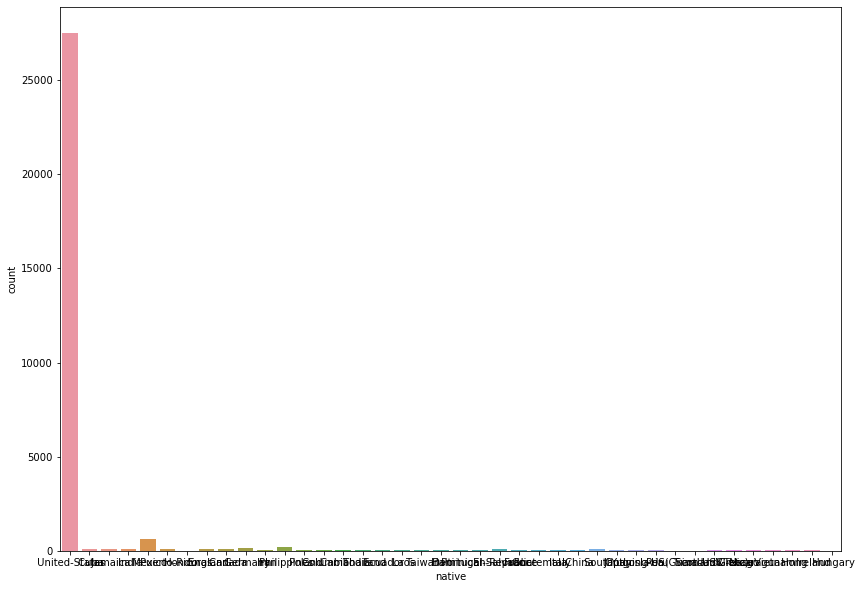

In [11]:
plt.figure(figsize=(14,10))
sns.countplot('native',data=df1)

Interpretation: from above fig, most people from United-States	

<AxesSubplot:xlabel='Salary', ylabel='count'>

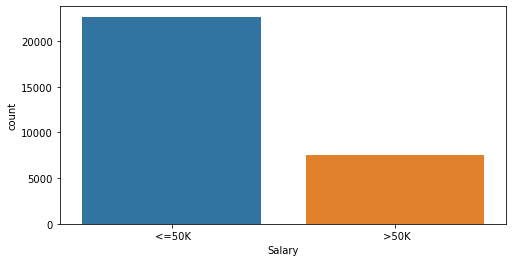

In [12]:
#check our data is Balance(visualize the target variable)
plt.figure(figsize=(8,4))
sns.countplot('Salary',data=df1)

# Cleaning data

In [13]:
# check null values
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
df1.shape

(30161, 14)

In [15]:
df1[df1.duplicated()].shape

(3258, 14)

In [16]:
#check duplicate records
df1[df1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [18]:
df1['workclass']=pd.DataFrame(lb.fit_transform(df1['workclass']))
df1['education']=pd.DataFrame(lb.fit_transform(df1['education']))
df1['maritalstatus']=pd.DataFrame(lb.fit_transform(df1['maritalstatus']))
df1['occupation']=pd.DataFrame(lb.fit_transform(df1['occupation']))
df1['relationship']=pd.DataFrame(lb.fit_transform(df1['relationship']))
df1['race']=pd.DataFrame(lb.fit_transform(df1['race']))
df1['sex']=pd.DataFrame(lb.fit_transform(df1['sex']))
df1['native']=pd.DataFrame(lb.fit_transform(df1['native']))

In [19]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [20]:
df1.shape

(30161, 14)

In [21]:
X=df1.iloc[:,:-1]
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [22]:
y=df1.iloc[:,-1:]

In [23]:
Z=lb.fit_transform(y)
z=Z.reshape(-1,1)

D:\anaconda\installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
y=pd.DataFrame(z)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


# Feature Engineering


In [25]:
#We can calculate the PPS of all the predictors in the dataframe against a target y
import ppscore as pps
pps.predictors(df,"Salary")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capitalgain,Salary,2.953948e-01,classification,True,weighted F1,0.643127,0.748545,DecisionTreeClassifier()
1,education,Salary,2.366993e-01,classification,True,weighted F1,0.643127,0.727598,DecisionTreeClassifier()
2,educationno,Salary,2.366993e-01,classification,True,weighted F1,0.643127,0.727598,DecisionTreeClassifier()
3,capitalloss,Salary,1.271312e-01,classification,True,weighted F1,0.643127,0.688496,DecisionTreeClassifier()
4,relationship,Salary,1.174597e-01,classification,True,weighted F1,0.643127,0.685045,DecisionTreeClassifier()
5,workclass,Salary,9.274449e-02,classification,True,weighted F1,0.643127,0.676225,DecisionTreeClassifier()
6,age,Salary,2.752510e-02,classification,True,weighted F1,0.643127,0.652950,DecisionTreeClassifier()
7,hoursperweek,Salary,2.080733e-02,classification,True,weighted F1,0.643127,0.650552,DecisionTreeClassifier()
8,native,Salary,5.812138e-03,classification,True,weighted F1,0.643127,0.645201,DecisionTreeClassifier()
9,maritalstatus,Salary,7.704246e-04,classification,True,weighted F1,0.643127,0.643401,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

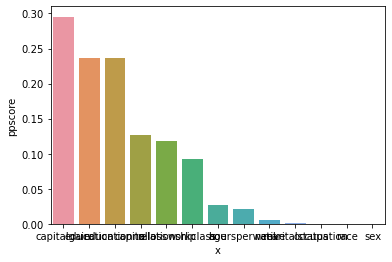

In [26]:
#Visualization of the results
predictors_df = pps.predictors(df, y="Salary")
sns.barplot(data=predictors_df, x="x", y="ppscore")

In [27]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=9)
fit=test.fit(X,y)
fit.scores_

array([7.92714625e+03, 4.06126126e+00, 2.64815807e+02, 2.17831744e+03,
       9.82227659e+02, 2.18597378e+02, 3.43538273e+03, 2.93395354e+01,
       4.59219298e+02, 7.41246624e+07, 1.25878577e+06, 5.56919407e+03,
       1.67073200e+01])

In [28]:
a=pd.DataFrame(X.columns)
b=pd.DataFrame(fit.scores_)
c=pd.concat([a,b],axis=1)
c.columns=['features','chi2_score']
c.sort_values(by='chi2_score',ascending=False)

,features,chi2_score
9,capitalgain,7.412466e+07
10,capitalloss,1.258786e+06
0,age,7.927146e+03
11,hoursperweek,5.569194e+03
6,relationship,3.435383e+03
3,educationno,2.178317e+03
4,maritalstatus,9.822277e+02
8,sex,4.592193e+02
2,education,2.648158e+02
5,occupation,2.185974e+02


In [29]:
X_final=X.drop(columns={'native','race','workclass'},axis=1)
X_final

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek
0,39,9,13,4,0,1,1,2174,0,40
1,50,9,13,2,3,0,1,0,0,13
2,38,11,9,0,5,1,1,0,0,40
3,53,1,7,2,5,0,1,0,0,40
4,28,9,13,2,9,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...
30156,27,7,12,2,12,5,0,0,0,38
30157,40,11,9,2,6,0,1,0,0,40
30158,58,11,9,6,0,4,0,0,0,40
30159,22,11,9,4,0,3,1,0,0,20


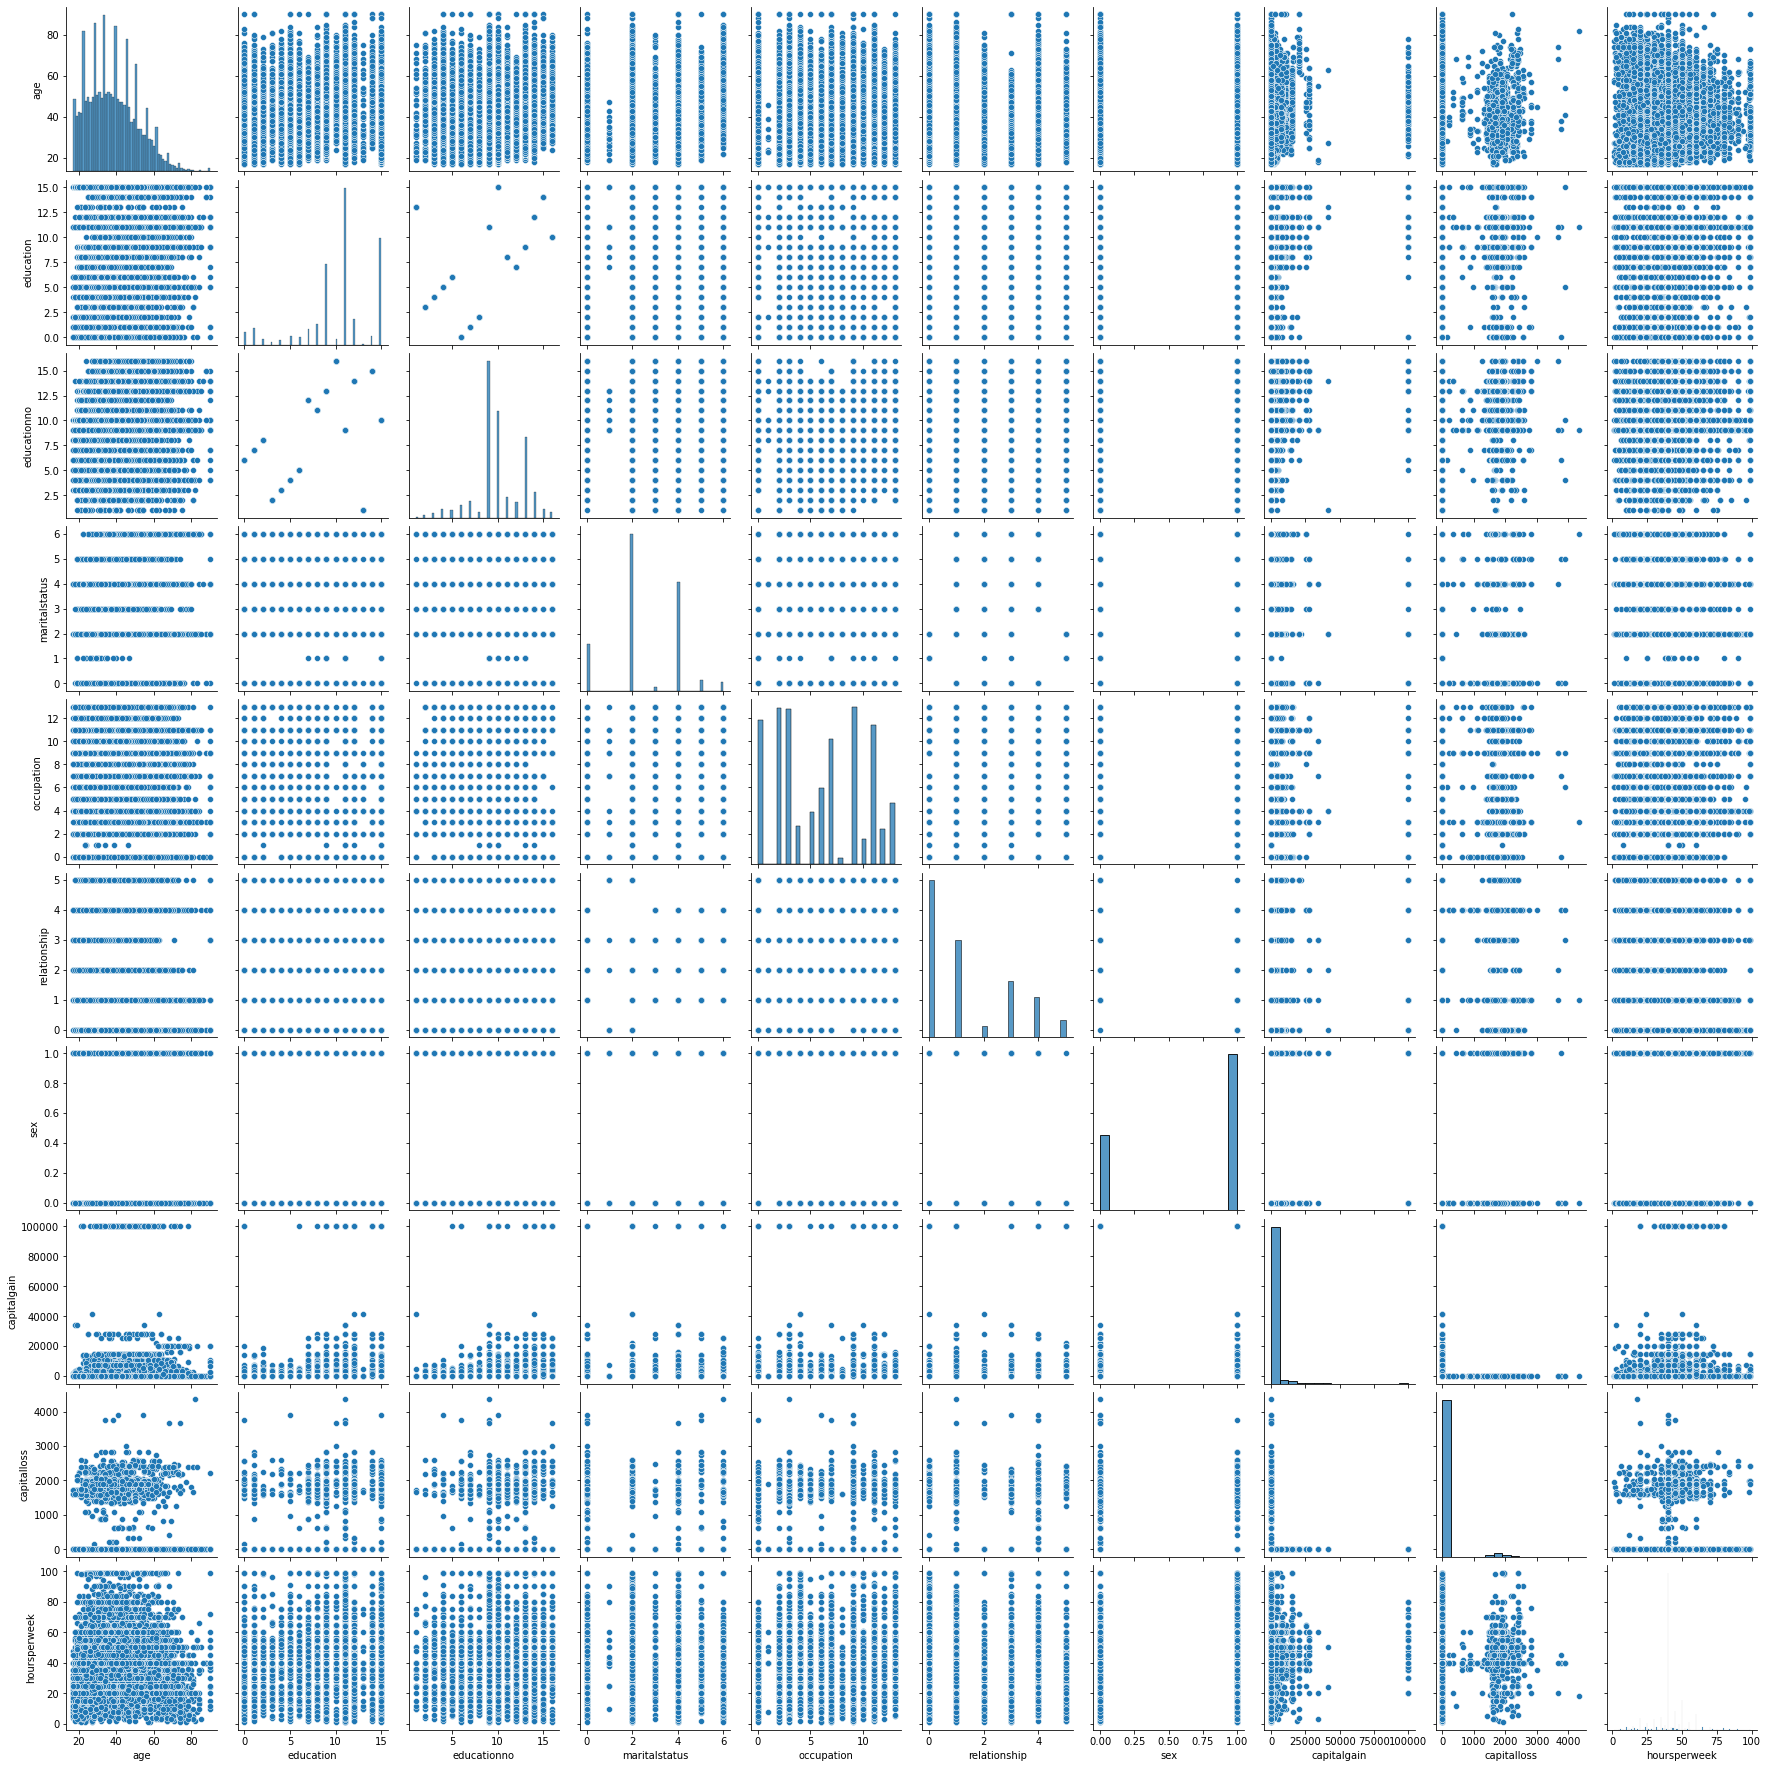

In [30]:
# finally we see pair plot
sns.pairplot(X_final)

In [31]:
#Standardized data
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_scale=SS.fit_transform(X_final)
X_scale

array([[ 0.04277892, -0.34982703,  1.12889813, ...,  0.14608503,
        -0.21850808, -0.07773541],
       [ 0.88026081, -0.34982703,  1.12889813, ..., -0.14744712,
        -0.21850808, -2.33149486],
       [-0.0333558 ,  0.1748048 , -0.4397325 , ..., -0.14744712,
        -0.21850808, -0.07773541],
       ...,
       [ 1.48933854,  0.1748048 , -0.4397325 , ..., -0.14744712,
        -0.21850808, -0.07773541],
       [-1.25151126,  0.1748048 , -0.4397325 , ..., -0.14744712,
        -0.21850808, -1.74718685],
       [ 1.03253024,  0.1748048 , -0.4397325 , ...,  1.88108414,
        -0.21850808, -0.07773541]])

In [32]:
X_scale.shape

(30161, 10)

# Train the model using Naive Bayes

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,random_state=1,test_size=0.01)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29859, 10), (302, 10), (29859, 1), (302, 1))

In [35]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB as MB
clf=GaussianNB()
clf.fit(X_train,y_train)

D:\anaconda\installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [36]:
clf.score(X_train,y_train)

0.7942328946046419

In [37]:
'''# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)
train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==y_train) 

test_pred_m = classifier_mb.predict(X_test)
accuracy_test_m = np.mean(test_pred_m==y_test)'''

'# Multinomial Naive Bayes\nclassifier_mb = MB()\nclassifier_mb.fit(X_train,y_train)\ntrain_pred_m = classifier_mb.predict(X_train)\naccuracy_train_m = np.mean(train_pred_m==y_train) \n\ntest_pred_m = classifier_mb.predict(X_test)\naccuracy_test_m = np.mean(test_pred_m==y_test)'

## Predicting The Test result on training data

In [38]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [39]:
clf.score(X_test,y_test)

0.7913907284768212

#### Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[224  52]
 [ 11  15]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       276
           1       0.22      0.58      0.32        26

    accuracy                           0.79       302
   macro avg       0.59      0.69      0.60       302
weighted avg       0.89      0.79      0.83       302



# Loading Test Dataset for testing

In [41]:
DF=pd.read_csv('D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Naive Bayes\\SalaryData_Test.csv')
DF.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [42]:
df_test=DF.copy()

## Preprocessing on  Test Data

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [44]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [45]:
df_test.shape

(15060, 14)

## Data Visulisation

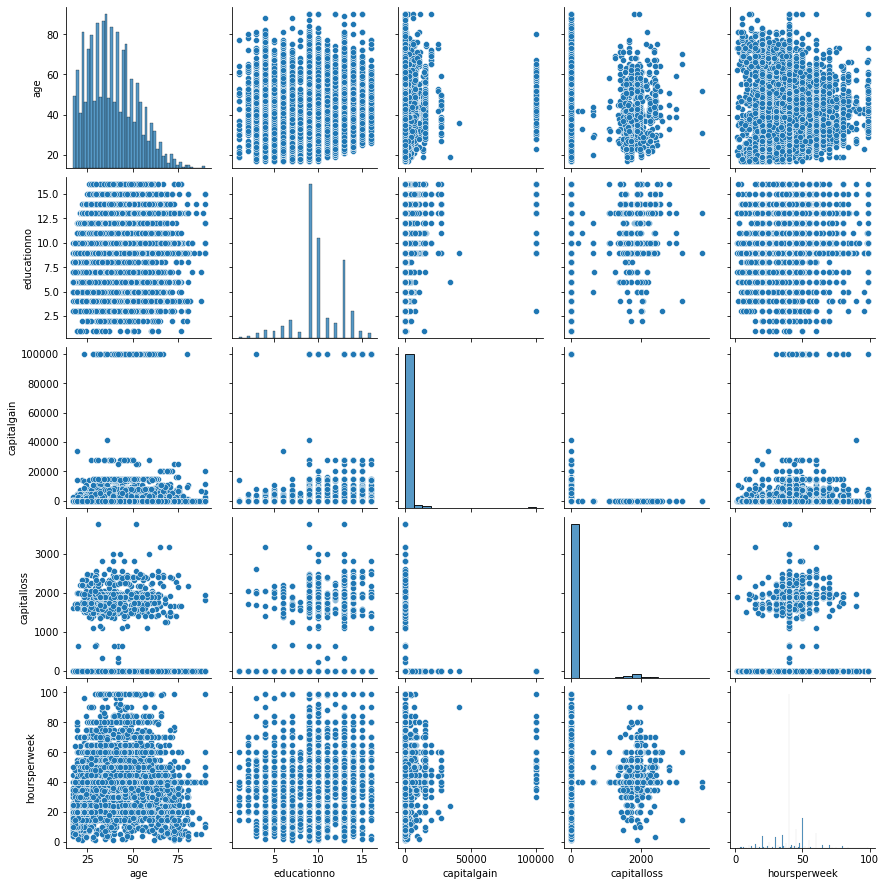

In [46]:
sns.pairplot(df_test)

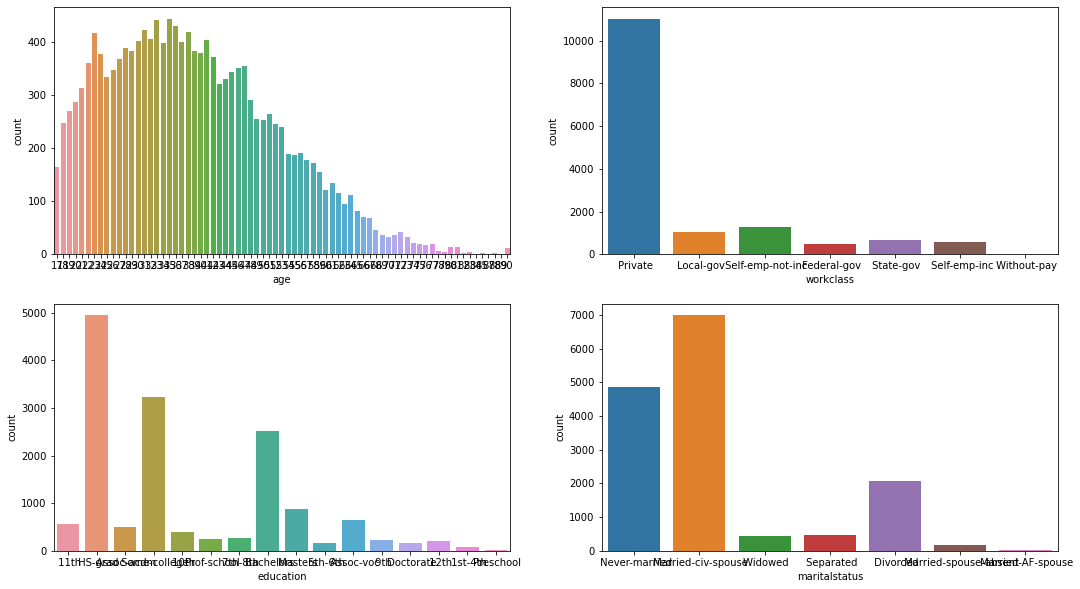

In [47]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.countplot('age',data=df_test)
plt.subplot(222)
sns.countplot('workclass',data=df_test)
plt.subplot(223)
sns.countplot('education',data=df_test)
plt.subplot(224)
sns.countplot('maritalstatus',data=df_test)
plt.show()

Interpretation:

##### 1) from above fig, maximum age is between 18 to 55 
##### 2) In workclass, count of privet is 10000+ 
##### 3) In education two entries are maximum (HS-grad and Some-college) 
##### 4) In marital status, most count in "Married-civ-spouse"

<AxesSubplot:xlabel='native', ylabel='count'>

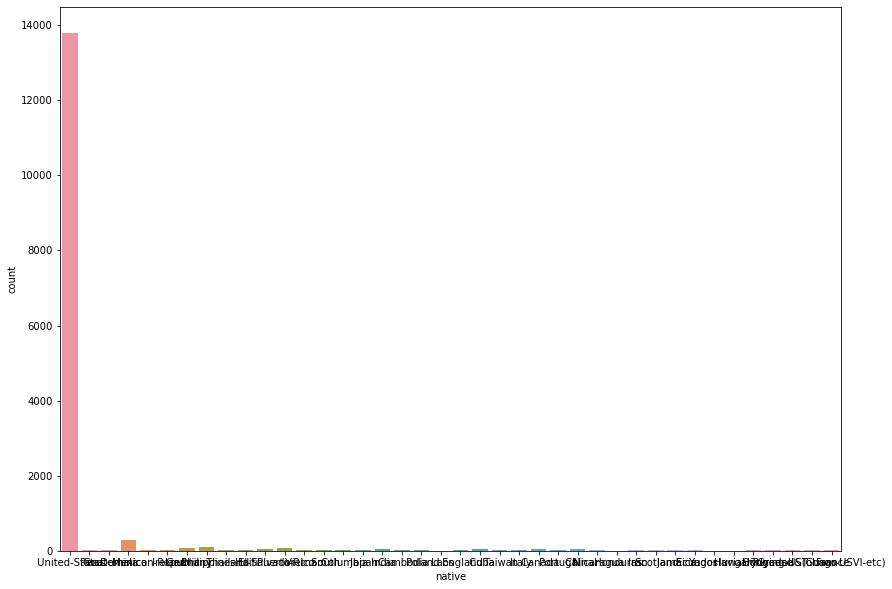

In [48]:
plt.figure(figsize=(14,10))
sns.countplot('native',data=df_test)

Interpretation: from above fig, most people from United-States	

# Cleaning test data

In [49]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [50]:
df_test['workclass']=pd.DataFrame(lb.fit_transform(df_test['workclass']))
df_test['education']=pd.DataFrame(lb.fit_transform(df_test['education']))
df_test['sex']=pd.DataFrame(lb.fit_transform(df_test['sex']))
df_test['race']=pd.DataFrame(lb.fit_transform(df_test['race']))
df_test['native']=pd.DataFrame(lb.fit_transform(df_test['native']))
df_test['maritalstatus']=pd.DataFrame(lb.fit_transform(df_test['maritalstatus']))
df_test['occupation']=pd.DataFrame(lb.fit_transform(df_test['occupation']))
df_test['relationship']=pd.DataFrame(lb.fit_transform(df_test['relationship']))

In [51]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [52]:
x_test1=df_test.iloc[:,:-1]
x_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [53]:
y_main=df_test.iloc[:,-1:]
y_main

,Salary
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
15055,<=50K
15056,<=50K
15057,<=50K
15058,<=50K


In [54]:
Y_main=lb.fit_transform(y_main)
Y_main

D:\anaconda\installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 1, ..., 0, 0, 1])

In [55]:
Z_main=Y_main.reshape(-1,1)
Z_main

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

# Feature Engineering on Test dataset

In [56]:
#We can calculate the PPS of all the predictors in the dataframe against a target y
import ppscore as pps
pps.predictors(df_test,"Salary")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capitalgain,Salary,3.006045e-01,classification,True,weighted F1,0.653386,0.757580,DecisionTreeClassifier()
1,education,Salary,1.799966e-01,classification,True,weighted F1,0.653386,0.715775,DecisionTreeClassifier()
2,educationno,Salary,1.799966e-01,classification,True,weighted F1,0.653386,0.715775,DecisionTreeClassifier()
3,capitalloss,Salary,1.555991e-01,classification,True,weighted F1,0.653386,0.707319,DecisionTreeClassifier()
4,workclass,Salary,1.073345e-01,classification,True,weighted F1,0.653386,0.690590,DecisionTreeClassifier()
5,relationship,Salary,6.562297e-02,classification,True,weighted F1,0.653386,0.676132,DecisionTreeClassifier()
6,hoursperweek,Salary,2.589644e-02,classification,True,weighted F1,0.653386,0.662362,DecisionTreeClassifier()
7,age,Salary,4.598982e-03,classification,True,weighted F1,0.653386,0.654980,DecisionTreeClassifier()
8,maritalstatus,Salary,1.274553e-07,classification,True,weighted F1,0.653386,0.653386,DecisionTreeClassifier()
9,occupation,Salary,1.274553e-07,classification,True,weighted F1,0.653386,0.653386,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

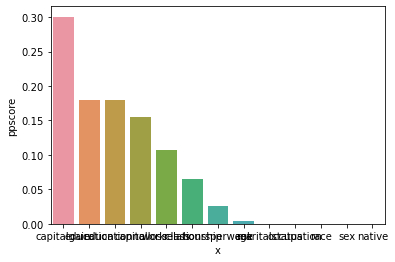

In [57]:
#Visualization of the results
predictors_df = pps.predictors(df_test, y="Salary")
sns.barplot(data=predictors_df, x="x", y="ppscore")

In [58]:
test1=SelectKBest(k=9,score_func=chi2)
fit=test1.fit(x_test1,Z_main)
fit.scores_

array([3.59847501e+03, 7.69442317e-01, 1.57089960e+02, 1.04767536e+03,
       4.79966405e+02, 8.68017192e+01, 1.81061577e+03, 1.34195512e+01,
       2.24708384e+02, 3.89155175e+07, 5.94799835e+05, 2.65293419e+03,
       2.90115250e+00])

In [59]:
a1=pd.DataFrame(X.columns)
b1=pd.DataFrame(fit.scores_)
c1=pd.concat([a1,b1],axis=1)
c1.columns=['features','chi2_score']
c1.sort_values(by='chi2_score',ascending=False)

,features,chi2_score
9,capitalgain,3.891552e+07
10,capitalloss,5.947998e+05
0,age,3.598475e+03
11,hoursperweek,2.652934e+03
6,relationship,1.810616e+03
3,educationno,1.047675e+03
4,maritalstatus,4.799664e+02
8,sex,2.247084e+02
2,education,1.570900e+02
5,occupation,8.680172e+01


In [60]:
X_final_test=x_test1.drop(columns={'native','race','workclass'},axis=1)
X_final_test

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek
0,25,1,7,4,6,3,1,0,0,40
1,38,11,9,2,4,0,1,0,0,50
2,28,7,12,2,10,0,1,0,0,40
3,44,15,10,2,6,0,1,7688,0,40
4,34,0,6,4,7,1,1,0,0,30
...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,4,9,3,1,0,0,40
15056,39,9,13,0,9,1,0,0,0,36
15057,38,9,13,2,9,0,1,0,0,50
15058,44,9,13,0,0,3,1,5455,0,40


# Build Model on Test DataSet

In [61]:
clf.score(X_final_test,Z_main)*100

77.53652058432935

In [62]:
y_pred_test=clf.predict(X_final_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

# Final Accuracy on Test Data

In [63]:
print(confusion_matrix(y_pred_test,Z_main))
print(classification_report(y_pred_test,Z_main))

[[10536  2559]
 [  824  1141]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     13095
           1       0.31      0.58      0.40      1965

    accuracy                           0.78     15060
   macro avg       0.62      0.69      0.63     15060
weighted avg       0.85      0.78      0.80     15060

